# Running Biomechanics Data Set processed files

Reginaldo K Fukuchi, Jan 2023, reginaldo.fukuchi@ufabc.edu.br

This NB prepares data to e exported as RBDSxxxxprocessed.txt

In [1]:
# Prepare environment
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
subject = 'SUB0044'

In [3]:
# Import data
pathname = r'C:\Users\Reginaldo\Documents\data\CNPq\RBDS_v2\RBA';
pathDir = os.path.join(pathname, subject)

In [4]:
speed = [25,35,45];
side   = ['Right','Left'];
joints = ['hip','knee','ankle'];
varListRBA = ['Stride_Length','Strides_Per_Minute','Stride_Width'];
direction = ['X','Y','Z']

## Emsemble avg angles, moments, powers and GRFs

In [5]:
# preallocate
angs_data = np.empty(shape=(101,len(speed),len(side),len(joints),len(direction),1))*np.NaN
moms_data = np.empty(shape=(101,len(speed),len(side),len(joints),len(direction),1))*np.NaN
pows_data = np.empty(shape=(101,len(speed),len(side),len(joints),1))*np.NaN
grfs_data = np.empty(shape=(101,len(speed),len(side),len(direction),1))*np.NaN

grfs_trials= np.empty(shape=(101,len(speed),len(side),len(direction),100))*np.NaN 

for v, velo in enumerate(speed):
    # Import Temporal Distance Gait Parameters
    # Read columns
    filename = os.path.join(pathDir,'RUNT'+str(speed[v])+'tempSpatGaitParams.txt')
    head_SPTparams = pd.read_csv(filename, delimiter='\t', header=1)
    SPTparams_labels = head_SPTparams.columns.tolist()
    # Read data only
    data_SPTparams = pd.read_csv(filename, delimiter='\t', skiprows=4)
    # Create another df
    df_SPT = pd.DataFrame(data=data_SPTparams.values, columns=SPTparams_labels)
    df_SPT.drop(labels='Unnamed: 0', axis=1, inplace=True)

    spt_labels = []
    for s, sid in enumerate(side):
        #### SPATIOTEMPORAL PARAMETERS
        for stp, stpars in enumerate(varListRBA):
            if stpars=='Stride_Width':
                varFullName = stpars + '_Mean'
            else:
                varFullName = sid+'_'+stpars+'_Mean'
            # Columns names of the STP of interest
            spt_labels.append(varFullName)


        for j, joint in enumerate(joints):        

            # Filename for angles
            fname_angs= os.path.join(pathDir,'RUN'+str(speed[v])+sid[0]+joint+'Ang.txt')
            df_angs   = pd.read_csv(fname_angs, delimiter='\t', skiprows=4)
            df_angs   = df_angs.iloc[:,1:]
            # Filename for moments
            fname_moms= os.path.join(pathDir,'RUN'+str(speed[v])+sid[0]+joint+'Mom.txt')
            df_moms   = pd.read_csv(fname_moms, delimiter='\t', skiprows=4)
            df_moms   = df_moms.iloc[:,1:]
            # Filename for powers
            fname_pows= os.path.join(pathDir,'RUN'+str(speed[v])+sid[0]+joint+'Pow.txt')
            df_pows   = pd.read_csv(fname_pows, delimiter='\t', skiprows=4)
            df_pows   = df_pows.iloc[:,1:]

            if joint=='hip': # Filename for GRFs        
                fname_grfs= os.path.join(pathDir,'RUN'+str(speed[v])+sid[0]+'grf.txt')
                df_grfs   = pd.read_csv(fname_grfs, delimiter='\t', skiprows=4)
                df_grfs   = df_grfs.iloc[:,1:]

            for xyz, axes in enumerate(direction):
                angs_data[:, v, s, j, xyz, 0] = df_angs.iloc[:,xyz::3].mean(axis=1, skipna=True)
                moms_data[:, v, s, j, xyz, 0] = df_moms.iloc[:,xyz::3].mean(axis=1, skipna=True)
            pows_data[:, v, s, j, 0] = df_pows.mean(axis=1, skipna=True)
            grfs_data[:, v, s, j, 0] = df_grfs.iloc[:,j::3].mean(axis=1, skipna=True)
            
            grfs_trials[:, v, s, j, 0:int(df_grfs.shape[1]/3)] = df_grfs.iloc[:,j::3]

stp_params = df_SPT[spt_labels]

#### Column names consistent to the processed files in the RBDS study

In [6]:
columns = ['RhipAngX25', 'RhipAngY25', 'RhipAngZ25', 'RkneeAngX25', 'RkneeAngY25', 'RkneeAngZ25',
           'RankleAngX25', 'RankleAngY25', 'RankleAngZ25', 'RhipMomX25', 'RhipMomY25', 'RhipMomZ25',
           'RkneeMomX25', 'RkneeMomY25', 'RkneeMomZ25', 'RankleMomX25', 'RankleMomY25', 'RankleMomZ25',
           'RgrfX25', 'RgrfY25', 'RgrfZ25', 'RhipPow25', 'RkneePow25', 'RanklePow25',
           'RhipAngX35', 'RhipAngY35', 'RhipAngZ35', 'RkneeAngX35', 'RkneeAngY35', 'RkneeAngZ35',
           'RankleAngX35', 'RankleAngY35', 'RankleAngZ35', 'RhipMomX35', 'RhipMomY35', 'RhipMomZ35',
           'RkneeMomX35', 'RkneeMomY35', 'RkneeMomZ35', 'RankleMomX35', 'RankleMomY35', 'RankleMomZ35',
           'RgrfX35', 'RgrfY35', 'RgrfZ35', 'RhipPow35', 'RkneePow35', 'RanklePow35',
           'RhipAngX45', 'RhipAngY45', 'RhipAngZ45', 'RkneeAngX45', 'RkneeAngY45', 'RkneeAngZ45',
           'RankleAngX45', 'RankleAngY45', 'RankleAngZ45', 'RhipMomX45', 'RhipMomY45', 'RhipMomZ45',
           'RkneeMomX45', 'RkneeMomY45', 'RkneeMomZ45', 'RankleMomX45', 'RankleMomY45', 'RankleMomZ45',
           'RgrfX45', 'RgrfY45', 'RgrfZ45', 'RhipPow45', 'RkneePow45', 'RanklePow45',
           'LhipAngX25', 'LhipAngY25', 'LhipAngZ25', 'LkneeAngX25', 'LkneeAngY25', 'LkneeAngZ25',
           'LankleAngX25', 'LankleAngY25', 'LankleAngZ25', 'LhipMomX25', 'LhipMomY25', 'LhipMomZ25',
           'LkneeMomX25', 'LkneeMomY25', 'LkneeMomZ25', 'LankleMomX25', 'LankleMomY25', 'LankleMomZ25',
           'LgrfX25', 'LgrfY25', 'LgrfZ25', 'LhipPow25', 'LkneePow25', 'LanklePow25',
           'LhipAngX35', 'LhipAngY35', 'LhipAngZ35', 'LkneeAngX35', 'LkneeAngY35', 'LkneeAngZ35',
           'LankleAngX35', 'LankleAngY35', 'LankleAngZ35', 'LhipMomX35', 'LhipMomY35', 'LhipMomZ35',
           'LkneeMomX35', 'LkneeMomY35', 'LkneeMomZ35', 'LankleMomX35', 'LankleMomY35', 'LankleMomZ35',
           'LgrfX35', 'LgrfY35', 'LgrfZ35', 'LhipPow35', 'LkneePow35', 'LanklePow35',
           'LhipAngX45', 'LhipAngY45', 'LhipAngZ45', 'LkneeAngX45', 'LkneeAngY45', 'LkneeAngZ45',
           'LankleAngX45', 'LankleAngY45', 'LankleAngZ45', 'LhipMomX45', 'LhipMomY45', 'LhipMomZ45',
           'LkneeMomX45', 'LkneeMomY45', 'LkneeMomZ45', 'LankleMomX45', 'LankleMomY45', 'LankleMomZ45',
           'LgrfX45', 'LgrfY45', 'LgrfZ45', 'LhipPow45', 'LkneePow45', 'LanklePow45']

### Create array with angles, moments, GRFs and powers with order consistent than proecessed files

In [7]:
side_data = np.empty(shape=(101,72*len(side)))
for s, sid in enumerate(side):
    speed_data = np.empty(shape=(101,24*len(speed)))
    for v, velo in enumerate(speed):
        angs = np.empty(shape=(101,len(joints)*len(direction)))
        moms = np.empty(shape=(101,len(joints)*len(direction)))
        pows = np.empty(shape=(101,len(joints)))
        grfs = np.empty(shape=(101,len(direction)))
        for j, joint in enumerate(joints):
            for xyz, axes in enumerate(direction):
                angs[:,3*j+xyz] = angs_data[:, v, s, j, xyz, 0] # Angles
                moms[:,3*j+xyz] = moms_data[:, v, s, j, xyz, 0] # Moments
                
            pows[:,j] = pows_data[:, v, s, j, 0] # Powers
            grfs[:,j] = grfs_data[:, v, s, j, 0] # GRFs
            
        speed_data[:, 24*v:24*(v+1)] = np.hstack([angs, moms, grfs, pows])
    side_data[:, 72*s:72*(s+1)] = speed_data

### Create df

In [8]:
df_rbds = pd.DataFrame(data=side_data, columns=columns).round(6)
df_rbds['PercGcycle'] = list(range(0,101))
df_rbds.set_index('PercGcycle', inplace=True)
# Export to txt
df_rbds.to_csv(os.path.join(r'../data',subject+'processed.txt'), sep='\t')
df_rbds.head()

,RhipAngX25,RhipAngY25,RhipAngZ25,RkneeAngX25,RkneeAngY25,RkneeAngZ25,RankleAngX25,RankleAngY25,RankleAngZ25,RhipMomX25,...,LkneeMomZ45,LankleMomX45,LankleMomY45,LankleMomZ45,LgrfX45,LgrfY45,LgrfZ45,LhipPow45,LkneePow45,LanklePow45
PercGcycle,,,,,,,,,,,,,,,,,,,,,
0,6.658103,2.636962,37.259516,1.977844,-24.421702,14.539155,10.258344,10.389717,12.440433,-0.178114,...,-0.761616,0.088752,0.315497,0.140182,-0.072483,0.625185,-0.034342,4.297906,1.153599,0.668745
1,6.477208,3.152803,37.074081,2.128047,-24.294270,15.276102,8.884774,10.323453,11.618004,-0.055064,...,-0.708080,0.055935,0.272772,0.054183,-0.168355,1.958928,-0.048556,3.536935,2.067778,0.623580
2,6.266103,3.778158,36.724204,2.427934,-24.128268,16.291633,6.982289,10.157607,10.414985,0.086622,...,-0.661711,0.020486,0.222016,-0.062334,-0.337274,4.063178,-0.072967,2.518004,2.710414,0.082992
3,6.090142,4.442706,36.234751,2.821841,-23.856584,17.591228,4.738774,9.811177,9.059113,0.241139,...,-0.588127,-0.013361,0.162699,-0.190226,-0.603318,6.913232,-0.108205,0.859169,2.996797,-0.857792
4,6.004022,5.074559,35.657168,3.260805,-23.426954,19.203470,2.406583,9.232408,7.858456,0.400849,...,-0.440940,-0.036823,0.124515,-0.279916,-0.996496,10.272063,-0.143910,-1.678066,2.562357,-1.458370


## Visualize data

In [9]:
cor = ['b','r','k']

## Hip, knee and ankle angles

<IPython.core.display.Javascript object>


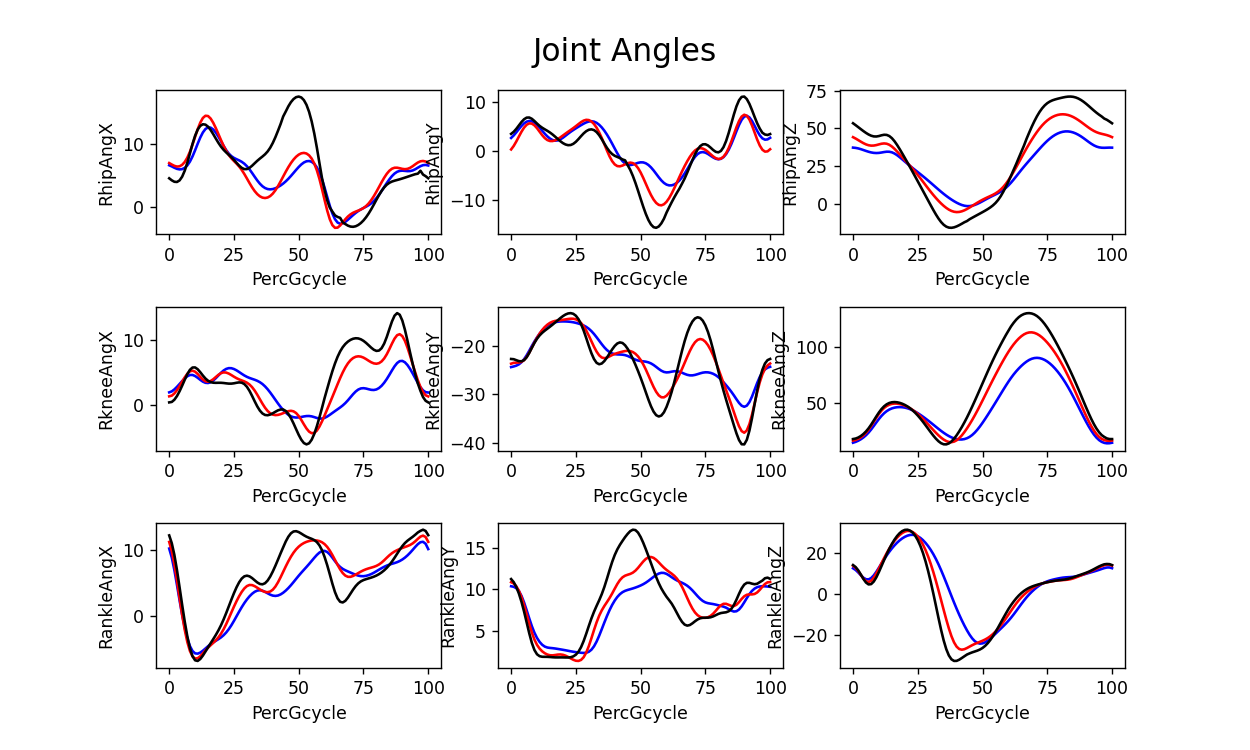

In [10]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 6))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Joint Angles", fontsize=18, y=0.95)

for j, joint in enumerate(joints):
    for xyz, axes in enumerate(direction):
        for v, vel in enumerate(speed):
            df_rbds.plot(y='R'+joint+'Ang'+axes+str(vel), use_index=True, ax=axs[j,xyz], 
                         legend=False, color=cor[v], ylabel='R'+joint+'Ang'+axes)

## Hip, knee and ankle moments

<IPython.core.display.Javascript object>


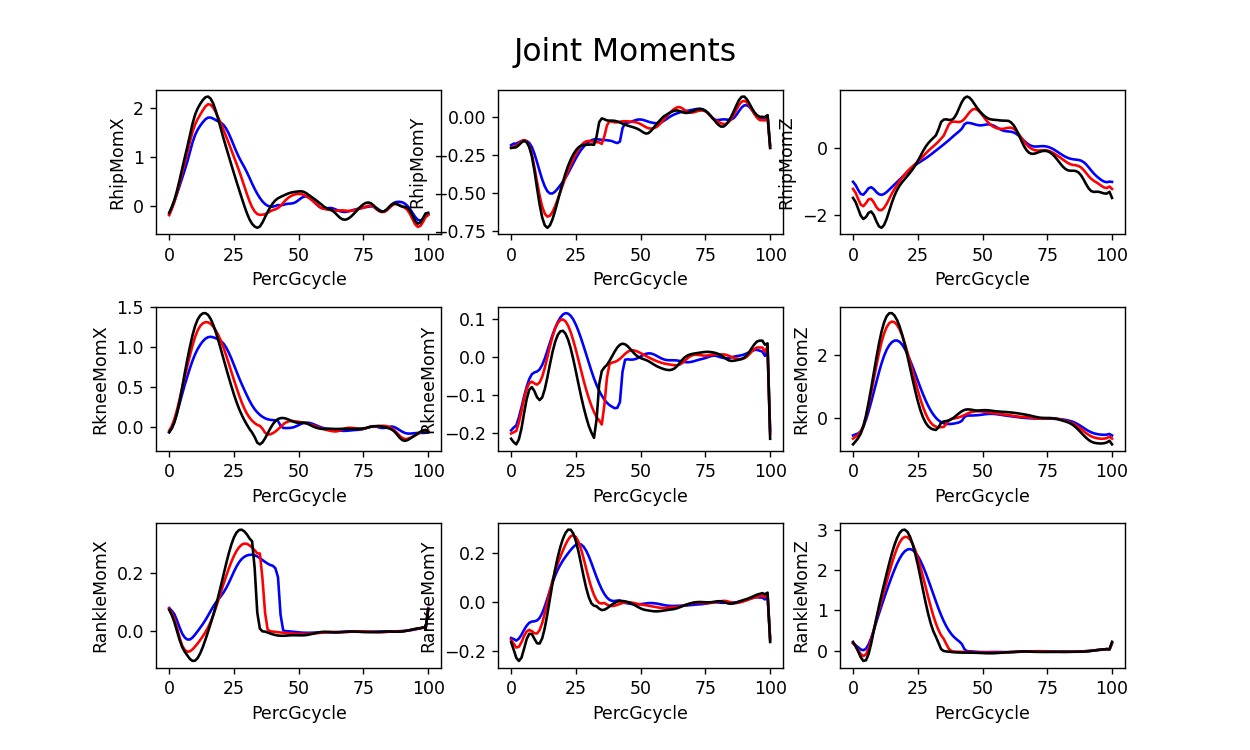

In [11]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 6))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Joint Moments", fontsize=18, y=0.95)

for j, joint in enumerate(joints):
    for xyz, axes in enumerate(direction):
        for v, vel in enumerate(speed):
            df_rbds.plot(y='R'+joint+'Mom'+axes+str(vel), use_index=True, ax=axs[j,xyz], 
                         legend=False, color=cor[v], ylabel='R'+joint+'Mom'+axes)

## Hip, knee and ankle powers

<IPython.core.display.Javascript object>


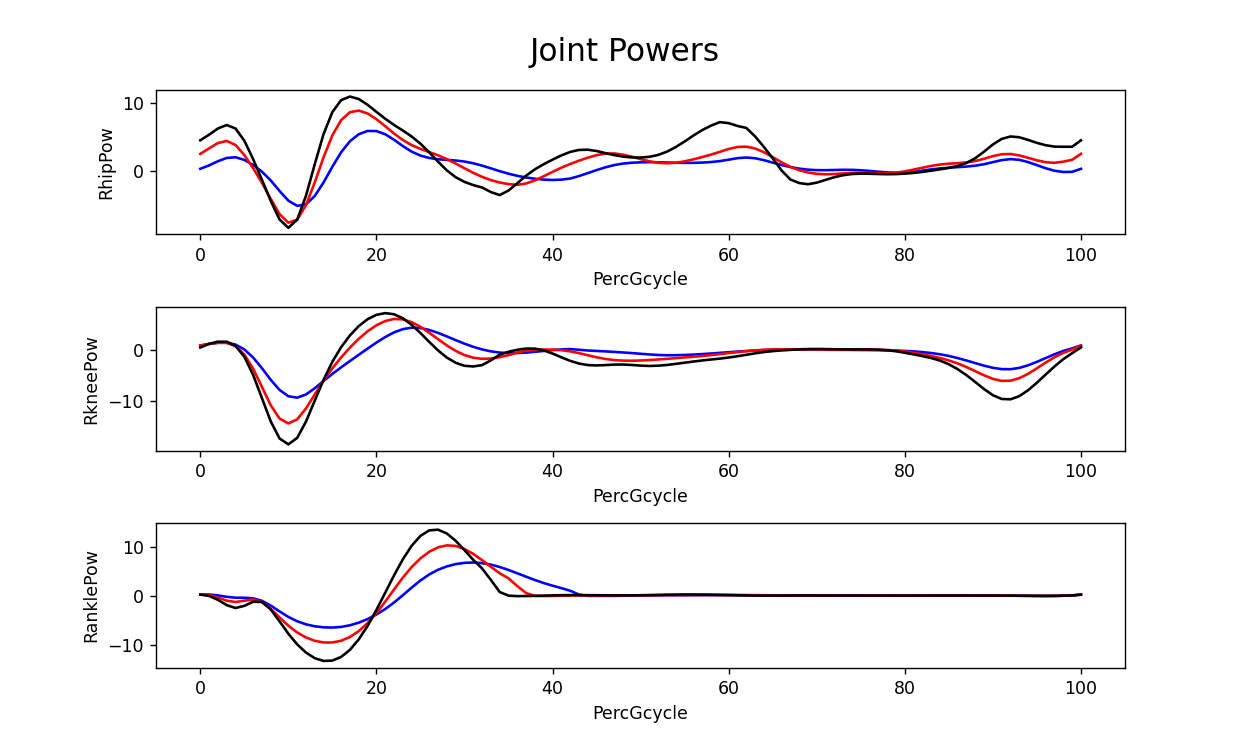

In [12]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 6))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Joint Powers", fontsize=18, y=0.95)

for j, joint in enumerate(joints):
    for v, vel in enumerate(speed):
        df_rbds.plot(y='R'+joint+'Pow'+str(vel), use_index=True, ax=axs[j], 
                     legend=False, color=cor[v], ylabel='R'+joint+'Pow')

## GRFs

<IPython.core.display.Javascript object>


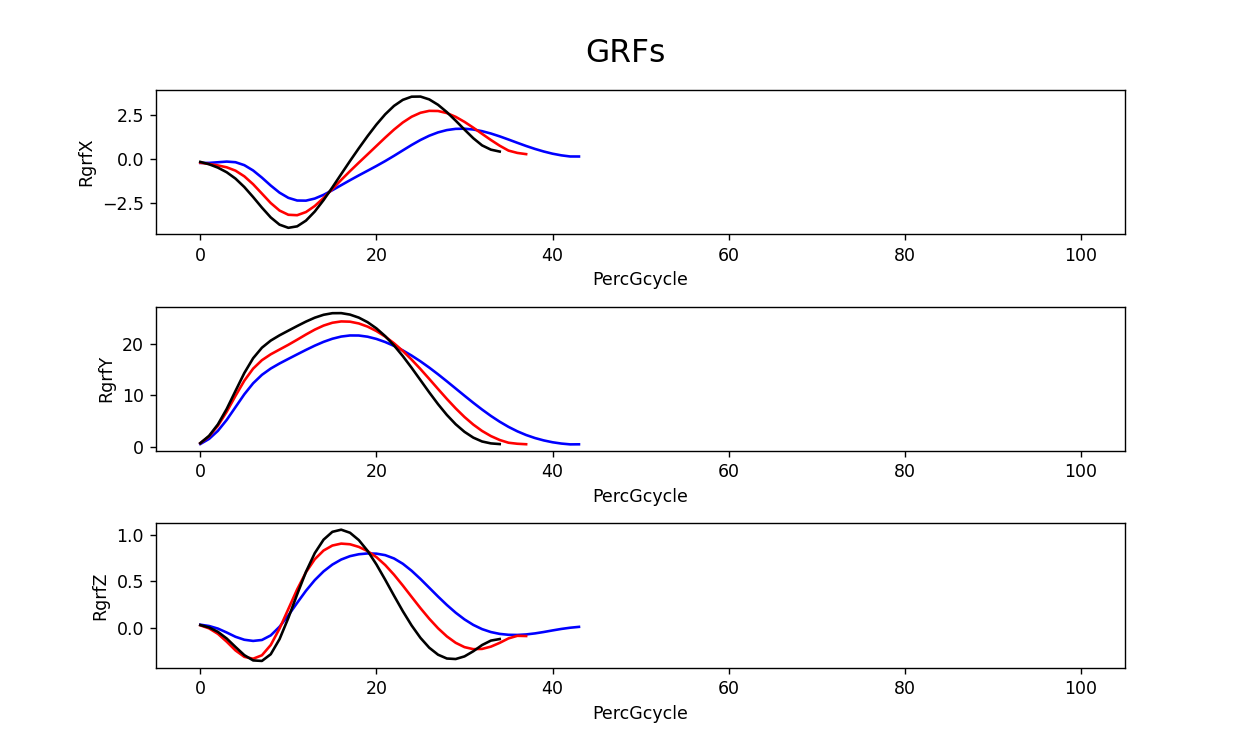

In [13]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 6))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("GRFs", fontsize=18, y=0.95)

for xyz, axes in enumerate(direction):
    for v, vel in enumerate(speed):
        df_rbds.plot(y='R'+'grf'+axes+str(vel), use_index=True, ax=axs[xyz], 
                     legend=False, color=cor[v], ylabel='R'+'grf'+axes)
        
plt.show()